# Convolutional Neural Network

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import *
from keras import optimizers

%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Building the model

In [2]:
image_width = 224
image_height = 224
num_classes = 20

In [3]:
model = Sequential()
model.add(Conv2D(32, 3, padding="same", activation="relu", input_shape=(image_height, image_width, 3)))
model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPooling2D(2))
model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPooling2D(2))
model.add(Conv2D(128, 3, padding="same", activation="relu"))
model.add(Conv2D(128, 3, padding="same", activation="relu"))
model.add(MaxPooling2D(2))
model.add(Conv2D(256, 3, padding="same", activation="relu"))
model.add(Conv2D(256, 3, padding="same", activation="relu"))
model.add(GlobalAveragePooling2D())
model.add(Dense(num_classes))
model.add(Activation("softmax"))

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 128)       73856     
__________

In [5]:
model.compile(loss="categorical_crossentropy",
              optimizer=optimizers.Adam(lr=1e-3),
              metrics=["accuracy"])

## Loading the data

In [6]:
images_dir = "snacks/"
train_data_dir = images_dir + "train/"
val_data_dir = images_dir + "val/"
test_data_dir = images_dir + "test/"

In [7]:
def normalize_pixels(image):
    return image / 127.5 - 1

In [8]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(preprocessing_function=normalize_pixels)

In [9]:
batch_size = 64

train_generator = datagen.flow_from_directory(
                    train_data_dir,
                    target_size=(image_width, image_height),
                    batch_size=batch_size,
                    class_mode="categorical",
                    shuffle=True)

val_generator = datagen.flow_from_directory(
                    val_data_dir,
                    target_size=(image_width, image_height),
                    batch_size=batch_size,
                    class_mode="categorical",
                    shuffle=False)

test_generator = datagen.flow_from_directory(
                    test_data_dir,
                    target_size=(image_width, image_height),
                    batch_size=batch_size,
                    class_mode="categorical",
                    shuffle=False)

Found 4838 images belonging to 20 classes.
Found 955 images belonging to 20 classes.
Found 952 images belonging to 20 classes.


In [10]:
index2class = {v:k for k,v in train_generator.class_indices.items()}

## Evaluating the untrained model

In [11]:
model.evaluate_generator(test_generator, steps=len(test_generator))

[2.995397058855586, 0.05252100846597126]

## Training

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
histories = []

In [14]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=len(train_generator),
                              validation_data=val_generator,
                              validation_steps=len(val_generator),
                              epochs=5,
                              workers=8)
histories.append(history)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
76/76 [==============================] - 16s 214ms/step - loss: 2.9836 - acc: 0.0531 - val_loss: 2.9345 - val_acc: 0.0859
Epoch 2/5
76/76 [==============================] - 14s 179ms/step - loss: 2.9005 - acc: 0.0874 - val_loss: 2.8862 - val_acc: 0.1026
Epoch 3/5
76/76 [==============================] - 14s 179ms/step - loss: 2.8644 - acc: 0.0978 - val_loss: 2.8582 - val_acc: 0.0953
Epoch 4/5
76/76 [==============================] - 14s 179ms/step - loss: 2.8263 - acc: 0.1122 - val_loss: 2.8250 - val_acc: 0.1173
Epoch 5/5
76/76 [==============================] - 14s 179ms/step - loss: 2.7957 - acc: 0.1279 - val_loss: 2.7996 - val_acc: 0.1372


In [19]:
histories.append(model.fit_generator(train_generator, 
                                     steps_per_epoch=len(train_generator),
                                     validation_data=val_generator,
                                     validation_steps=len(val_generator),
                                     epochs=25,
                                     workers=8)

Epoch 1/25
76/76 [==============================] - 14s 182ms/step - loss: 2.7231 - acc: 0.1587 - val_loss: 2.6570 - val_acc: 0.1832
Epoch 2/25
76/76 [==============================] - 13s 175ms/step - loss: 2.6177 - acc: 0.1847 - val_loss: 2.6251 - val_acc: 0.1979
Epoch 3/25
76/76 [==============================] - 13s 176ms/step - loss: 2.5491 - acc: 0.1988 - val_loss: 2.5637 - val_acc: 0.1990
Epoch 4/25
76/76 [==============================] - 13s 176ms/step - loss: 2.4863 - acc: 0.2269 - val_loss: 2.5637 - val_acc: 0.1969
Epoch 5/25
76/76 [==============================] - 13s 176ms/step - loss: 2.4395 - acc: 0.2385 - val_loss: 2.4846 - val_acc: 0.2230
Epoch 6/25
76/76 [==============================] - 13s 176ms/step - loss: 2.3981 - acc: 0.2460 - val_loss: 2.4475 - val_acc: 0.2482
Epoch 7/25
76/76 [==============================] - 13s 176ms/step - loss: 2.3674 - acc: 0.2600 - val_loss: 2.4392 - val_acc: 0.2482
Epoch 8/25
76/76 [==============================] - 13s 176ms/step - 

In [20]:
def combine_histories():
    history = { "loss": [], "val_loss": [], "acc": [], "val_acc": [] }
    for h in histories:
        for k in history.keys():
            history[k] += h.history[k]
    return history

In [21]:
history = combine_histories()

In [22]:
def plot_loss(history):
    fig = plt.figure(figsize=(10, 6))
    plt.plot(history["loss"])
    plt.plot(history["val_loss"])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["Train", "Validation"])
    plt.show()

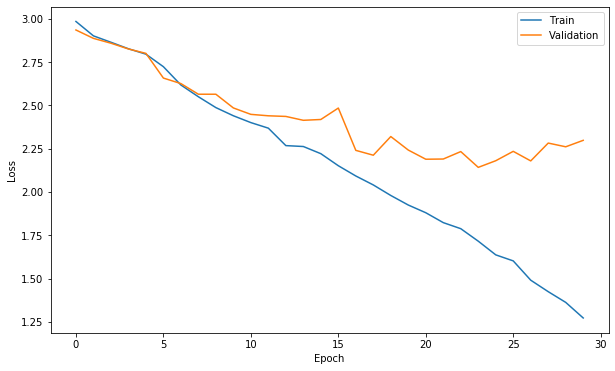

In [23]:
plot_loss(history)

In [24]:
def plot_accuracy(history):
    fig = plt.figure(figsize=(10, 6))
    plt.plot(history["acc"])
    plt.plot(history["val_acc"])
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["Train", "Validation"])
    plt.show()

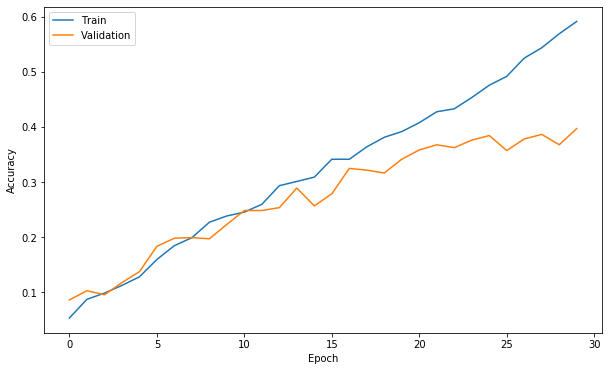

In [25]:
plot_accuracy(history)

## Lower the learning rate

In [26]:
import keras.backend as K
K.set_value(model.optimizer.lr, K.get_value(model.optimizer.lr) / 10)

In [27]:
histories.append(model.fit_generator(train_generator, 
                                     steps_per_epoch=len(train_generator),
                                     validation_data=val_generator,
                                     validation_steps=len(val_generator),
                                     epochs=10,
                                     workers=8))

Epoch 1/10
76/76 [==============================] - 14s 182ms/step - loss: 0.9960 - acc: 0.6840 - val_loss: 2.2397 - val_acc: 0.4241
Epoch 2/10
76/76 [==============================] - 13s 176ms/step - loss: 0.9087 - acc: 0.7157 - val_loss: 2.3039 - val_acc: 0.4335
Epoch 3/10
76/76 [==============================] - 13s 176ms/step - loss: 0.8636 - acc: 0.7296 - val_loss: 2.3812 - val_acc: 0.4262
Epoch 4/10
76/76 [==============================] - 13s 176ms/step - loss: 0.8080 - acc: 0.7356 - val_loss: 2.4207 - val_acc: 0.4335
Epoch 5/10
76/76 [==============================] - 13s 176ms/step - loss: 0.7923 - acc: 0.7487 - val_loss: 2.4736 - val_acc: 0.4094
Epoch 6/10
76/76 [==============================] - 13s 176ms/step - loss: 0.7667 - acc: 0.7548 - val_loss: 2.4888 - val_acc: 0.4178
Epoch 7/10
76/76 [==============================] - 13s 176ms/step - loss: 0.7251 - acc: 0.7663 - val_loss: 2.5372 - val_acc: 0.4293
Epoch 8/10
76/76 [==============================] - 13s 176ms/step - 

In [28]:
history = combine_histories()

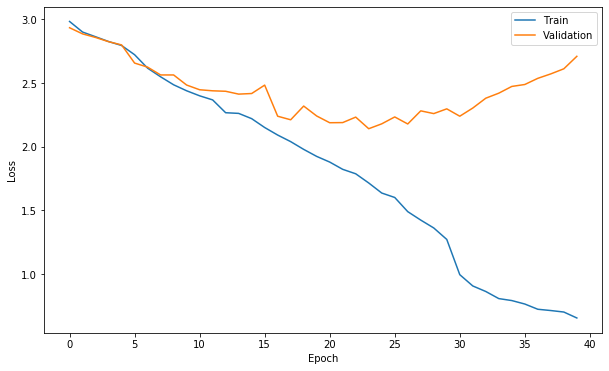

In [29]:
plot_loss(history)

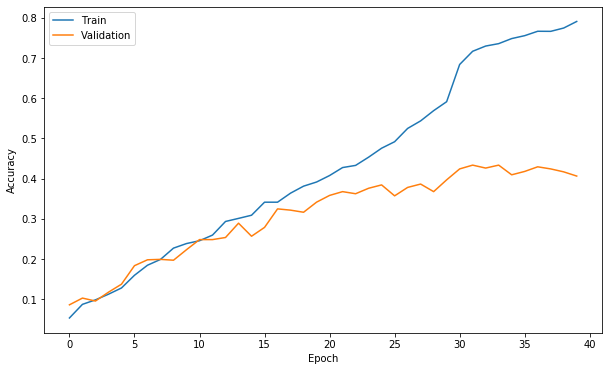

In [30]:
plot_accuracy(history)

## Test set score

In [32]:
model.evaluate_generator(test_generator, steps=len(test_generator))

[2.804596928989186, 0.3918067221881963]